In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
#%inline matplotlib
plt.style.use('ggplot')

In [8]:
sales = pd.read_csv('../data/processed/sales.csv',index_col=0)

In [9]:
sales

,Customer ID,Customer,Type,Date,Year,Month,Document Number,Description,Qty. Sold,Sales Price,Sales Total,Revenue,State
0,100626,Nome Public Schools,Invoice,2020-07-07,2020.0,7.0,INV19283,Safari Montage - K-12 Super Core Content Packa...,1,2750.00,2750.00,2750.00,AK
1,100626,Nome Public Schools,Invoice,2020-07-07,2020.0,7.0,INV19283,Safari Montage Additional Schlessinger Media K...,1,495.00,495.00,495.00,AK
2,100626,Nome Public Schools,Invoice,2020-07-07,2020.0,7.0,INV19283,Safari Montage Algebra's Cool - Content Packag...,1,500.00,500.00,500.00,AK
3,100626,Nome Public Schools,Invoice,2020-07-07,2020.0,7.0,INV19283,SAFARI Montage Learning Object Repository Annu...,1,1500.00,1500.00,1500.00,AK
4,100626,Nome Public Schools,Invoice,2020-07-07,2020.0,7.0,INV19283,Safari Montage Math's Cool - Content Package (...,1,500.00,500.00,500.00,AK
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9541,100893,Sunnyside Elementary School,Invoice,2015-02-04,2015.0,2.0,INV13303,Wireless Network Project cabling installation,0,13134.63,0.00,5253.85,WA
9542,100916,Tenth Street School,Invoice,2015-02-04,2015.0,2.0,INV13308,Wireless Network Project cabling installation,1,2799.42,2799.42,2799.42,WA
9543,100041,Arts & Technology High School,Invoice,2015-02-04,2015.0,2.0,INV13305,Wireless Network Project cabling installation,1,4442.85,4442.85,4442.85,WA
9544,100605,Mountain View High School,Invoice,2015-02-18,2015.0,2.0,INV13372,Wireless Network Project cabling installation,1,4553.59,4553.59,4553.59,WA


In [32]:
sales['Sales Price'].describe()

count      9546.000000
mean       1197.118202
std       12210.054074
min           0.000000
25%         120.000000
50%         391.570000
75%         995.000000
max      526875.000000
Name: Sales Price, dtype: float64

# EDA Work

In [10]:
sales.groupby('State')['Customer'].count()

State
AK        89
AZ         1
CA      2721
FL         7
GA         4
ID        46
LA         1
ME         4
NC         1
NH         3
NV      1815
OK         5
OR       485
PA         1
UT         1
VA         1
WA      4360
WACA       1
Name: Customer, dtype: int64

In [11]:
sales.groupby(['Customer','State']).sum().sort_values(by='Qty. Sold',ascending=False)

,,Customer ID,Year,Month,Qty. Sold,Sales Price,Sales Total,Revenue
Customer,State,,,,,,,
Oxnard School District,CA,6845492,137122.0,383.0,15732,23194.99,881517.05,881517.05
Silver Hills Elementary School,ID,2923780,58580.0,232.0,8200,20930.89,60656.50,60656.50
Lake Washington School District 414,WA,24014720,482244.0,1428.0,6100,139565.87,4100929.24,4100929.24
Kent School District 415,WA,803632,16135.0,63.0,4409,2341.50,140923.00,140923.00
Mukilteo School District 6,WA,24649205,494111.0,1607.0,3202,3002433.79,3469981.49,3951029.50
...,...,...,...,...,...,...,...,...
Eatonville School District 404,WA,200496,4032.0,10.0,0,1598.00,0.00,0.00
Sunnyside Elementary School,WA,201786,4030.0,3.0,0,26269.26,0.00,13134.63
Jefferson Middle School,WA,200848,4030.0,4.0,0,3062.00,0.00,0.00


In [12]:
sales.groupby(['Customer','State']).sum().sort_values(by='Revenue',ascending=False)

,,Customer ID,Year,Month,Qty. Sold,Sales Price,Sales Total,Revenue
Customer,State,,,,,,,
Antelope Valley High School District,CA,23808806,480306.0,1831.0,2775,283113.37,4773016.67,4773016.67
Lake Washington School District 414,WA,24014720,482244.0,1428.0,6100,139565.87,4100929.24,4100929.24
Mukilteo School District 6,WA,24649205,494111.0,1607.0,3202,3002433.79,3469981.49,3951029.50
Renton School District 403,WA,3928860,78775.0,241.0,1864,57046.65,3167470.55,3137243.19
Lake Washington School District 414,OR,3114880,62567.0,232.0,1556,50991.59,2701365.30,2701365.30
...,...,...,...,...,...,...,...,...
Olympic Continuation High School,CA,100657,2015.0,10.0,1,0.00,0.00,0.00
Washougal School District 112-6,WA,201982,4034.0,20.0,0,871.06,0.00,0.00
Gus Franklin Jr. Campus,CA,200708,4032.0,18.0,0,2500.00,0.00,0.00


In [13]:
Customer_list = sales['Customer'].unique()
# Customer_list = Customer_list.tolist()
# Customer_list = sorted(Customer_list)
# len(Customer_list)



In [14]:
sales['Customer'].astype('str').str.contains('school')

0       False
1       False
2       False
3       False
4       False
        ...  
9541    False
9542    False
9543    False
9544    False
9545    False
Name: Customer, Length: 9546, dtype: bool

In [15]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9546 entries, 0 to 9545
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer ID      9546 non-null   int64  
 1   Customer         9546 non-null   object 
 2   Type             9546 non-null   object 
 3   Date             9546 non-null   object 
 4   Year             9546 non-null   float64
 5   Month            9546 non-null   float64
 6   Document Number  9546 non-null   object 
 7   Description      9546 non-null   object 
 8   Qty. Sold        9546 non-null   int64  
 9   Sales Price      9546 non-null   float64
 10  Sales Total      9546 non-null   float64
 11  Revenue          9546 non-null   float64
 12  State            9546 non-null   object 
dtypes: float64(5), int64(2), object(6)
memory usage: 1.0+ MB


In [64]:
credit_memos = sales[sales['Type']=='Credit Memo']
credit_memos

,Customer ID,Customer,Type,Date,Year,Month,Document Number,Description,Qty. Sold,Sales Price,Sales Total,Revenue,State
555,100616,National School District,Credit Memo,2018-04-09,2018.0,4.0,411,"HoverCam Solo 8 - 8.0 MP, USB 3.0, 30 fps.",-1,329.0,-329.0,-329.0,CA
562,100616,National School District,Credit Memo,2018-11-05,2018.0,11.0,428,Promethean Academy - 1-Day Prof Development On...,-1,1550.0,-1550.0,-1550.0,CA
576,100616,National School District,Credit Memo,2018-12-26,2018.0,12.0,429,VTP-65 Wall Mount bracket,-1,0.0,-0.0,0.0,CA
658,100669,Oxnard School District,Credit Memo,2015-08-25,2015.0,8.0,283,Installation for replacement Promethean projec...,-2,75.0,-150.0,-150.0,CA
704,100673,Palm Lane Charter School,Credit Memo,2020-10-07,2020.0,10.0,449,Manual height adjustable mobile stand for use ...,-14,1065.0,-14910.0,-14910.0,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9309,100791,San Mateo-Foster City School District,Credit Memo,2015-04-22,2015.0,4.0,257,BoxLight Balance 70 For mounting interactive f...,-1,889.0,-889.0,-889.0,CA
9311,100791,San Mateo-Foster City School District,Credit Memo,2015-04-22,2015.0,4.0,257,BoxLight Balance Mobile Stand,-1,699.0,-699.0,-699.0,CA
9383,100629,North County Joint Union School District,Credit Memo,2015-08-10,2015.0,8.0,282,ROOM 17 & 20 BenQ PRJ PW02 PointWrite pen pack...,-2,200.0,-400.0,-400.0,CA
9431,100091,Burbank Unified School District,Credit Memo,2015-04-09,2015.0,4.0,244,"BoxLight ProjectoWrite 6 WX30N 3000 lumens, W...",-1,1301.0,-1301.0,-1301.0,CA


In [62]:
credit_sums = credit_memos[['Customer', 'Year', 'Sales Total']].groupby('Year').sum()
credit_sums = credit_sums.reset_index()
credit_sums['Year'] = credit_sums['Year'].astype(int)
credit_sums

,Year,Sales Total
0,2015,-55501.97
1,2016,-128337.86
2,2017,-45621.77
3,2018,-12560.23
4,2019,-107248.50
5,2020,-17040.00


# Pivot Tables

In [69]:
rev_by_state_2020 = pd.pivot_table(sales[sales['Year']==2020], index='State', values='Revenue', aggfunc=np.sum)
rev_by_state_2020 = rev_by_state_2020.reset_index()
rev_by_state_2020


,State,Revenue
0,AK,6335.00
1,CA,5303311.96
2,GA,9060.00
3,ID,88072.50
4,ME,15057.98
5,NV,1573922.55
6,OR,616299.18
7,WA,7119481.01


In [59]:
rev_by_year = pd.pivot_table(sales, index='Year', values='Sales Total', aggfunc=np.sum)
rev_by_year = rev_by_year.reset_index()
rev_by_year = pd.DataFrame(np.array([rev_by_year['Sales Total']]),columns=rev_by_year['Year'].astype(int), index=['Sales'] )
#pd.options.display.float_format = '${:,.0f}'.format
# pd.reset_option('all')
rev_by_year

Year,2015,2016,2017,2018,2019,2020
Sales,4008189.16,4984934.97,7932651.75,10079801.47,13014052.8,14773768.08


In [74]:

by_year = pd.pivot_table(sales, index='Year', values='Type', aggfunc=np.sum)
by_year

,Type
Year,
2015.0,InvoiceInvoiceInvoiceInvoiceInvoiceInvoiceInvo...
2016.0,InvoiceInvoiceInvoiceInvoiceInvoiceInvoiceInvo...
2017.0,InvoiceInvoiceInvoiceInvoiceInvoiceInvoiceInvo...
2018.0,InvoiceInvoiceInvoiceInvoiceInvoiceInvoiceInvo...
2019.0,InvoiceInvoiceInvoiceInvoiceInvoiceInvoiceInvo...
2020.0,InvoiceInvoiceInvoiceInvoiceInvoiceInvoiceInvo...


In [91]:
state_rev_by_year = pd.pivot_table(sales, index=['State','Year'], values='Revenue', aggfunc=np.sum)
state_rev_by_year = state_rev_by_year.reset_index()
state_rev_by_year['Year'] = state_rev_by_year['Year'].astype(int)
# state_rev_by_year = pd.DataFrame(np.array([state_rev_by_year['Revenue','State']]),columns=state_rev_by_year['Year'].astype(int), index=['Sales'] )
#pd.options.display.float_format = '${:,.0f}'.format
state_rev_by_year

,State,Year,Revenue
0,AK,2015,82061.40
1,AK,2016,15952.00
2,AK,2017,6040.00
3,AK,2018,11672.00
4,AK,2019,12263.00
5,AK,2020,6335.00
6,AZ,2019,2590.00
7,CA,2015,1244072.16
8,CA,2016,1733478.84
9,CA,2017,1906787.47


In [93]:

len(sales.columns)


12

In [ ]:
#sales.plot.hist(by='Customer', bins=33)

# Cohort Analysis work
* cohort by min year
* identifies new customers per year
* need to breakout retention

In [70]:
min_year = sales.groupby(['Customer'])['Year'].min()
sales['Cohort Year'] = sales.apply(lambda row: min_year.loc[row['Customer']],axis=1)
#sales['New Customer'] = sales['Cohort Year'] <=sales['First_Purchase']
min_year

Customer
ABSCO Alarms Inc.                    2017.0
AGC Apprenticeship & Training        2020.0
Aberdeen School District 5           2015.0
Abraham Lincoln Elem School          2017.0
Abraham Lincoln Elementary School    2016.0
                                      ...  
XIT Solutions                        2018.0
Yerington Elementary School          2015.0
Yerington High School                2015.0
Yerington Intermediate School        2018.0
Yvonne Shaw Middle School            2015.0
Name: Year, Length: 990, dtype: float64

In [71]:
cohorts = sales.groupby(sales['Cohort Year'])['Customer'].nunique()
print(cohorts.head(6))
cohorts.sum()

Cohort Year
2015.0    452
2016.0    179
2017.0    125
2018.0     98
2019.0     66
2020.0     70
Name: Customer, dtype: int64


990

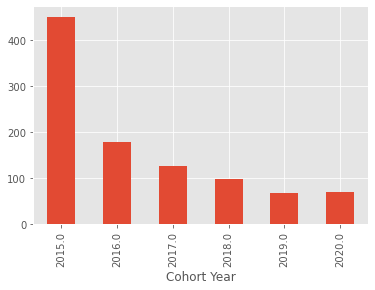

In [73]:
cohorts.plot.bar();

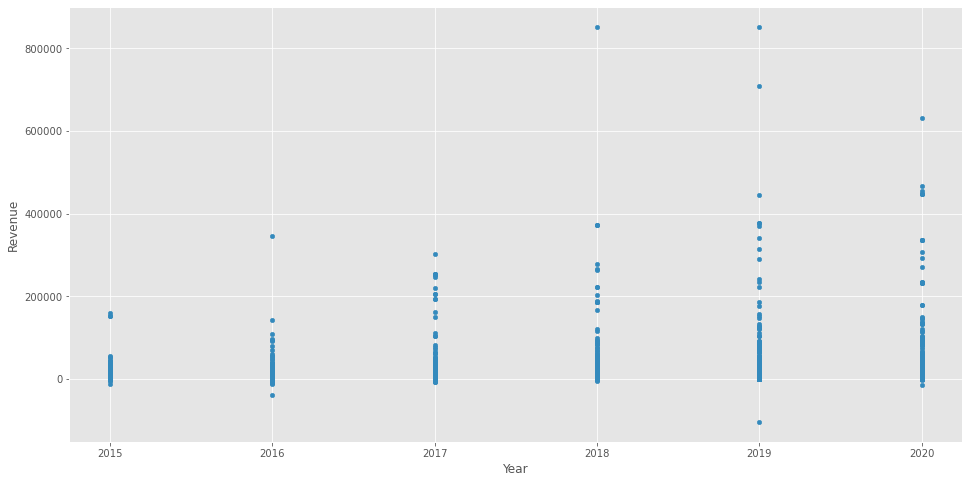

In [74]:
sales.plot(x='Year', y='Revenue',kind='scatter', figsize=(16,8));


In [888]:
sales[['Customer','State', 'Year','Qty. Sold','Revenue']].sort_values(by='Revenue',ascending=False)

,Customer,State,Year,Qty. Sold,Revenue
3291,Mukilteo School District 6,WA,2018,252,852258.96
1987,Mukilteo School District 6,WA,2019,252,852258.96
2076,Renton School District 403,WA,2019,256,708364.80
145,Southern Kern Unified School District,CA,2020,186,632214.00
684,Lake Washington School District 414,WA,2020,172,467556.20
...,...,...,...,...,...
6383,Central Kitsap School District 401,WA,2016,-9,-11691.00
8400,Kodiak Area Native Association,AK,2015,-1,-12600.00
134,Palm Lane Charter School,CA,2020,-14,-14910.00
6459,Federal Way High School,WA,2016,-53,-38690.00


In [887]:
print(sales.loc[3291],'\n\n')
print(sales.loc[1987])

Type                                                         Invoice
Date                                             2018-12-12 00:00:00
Year                                                            2018
Month                                                             12
Document Number                                             INV18128
Description        ActivPanel 75" 4K with activConnect OPS-G - 2 ...
Qty. Sold                                                        252
Sales Price                                                   3451.0
Revenue                                                    852258.96
State                                                             WA
Customer                                  Mukilteo School District 6
cohort                                                           NaN
Cohort Year                                                     2015
First_Purchase                                   2015-01-06 00:00:00
Last_Purchase                     

In [856]:
# sales['Cohort Year'] = np.min(sales['Year'])
sales['First_Purchase'] = np.min(sales['Date'])
sales['Last_Purchase'] = np.max(sales['Date'])
sales['Maturity'] = pd.to_datetime(sales['Last_Purchase']) - pd.to_datetime(sales['First_Purchase'])
sales[['First_Purchase', 'Last_Purchase','Maturity']]
sales.head(11)

,Type,Date,Year,Month,Document Number,Description,Qty. Sold,Sales Price,Revenue,State,Customer,cohort,Cohort Year,First_Purchase,Last_Purchase,Maturity
0,Invoice,2020-07-07,2020,7,INV19283,Safari Montage - K-12 Super Core Content Packa...,1,2750.0,2750.0,AK,Nome Public Schools,NaN,2015,2015-01-06,2020-12-31,2186 days
1,Invoice,2020-07-07,2020,7,INV19283,Safari Montage Additional Schlessinger Media K...,1,495.0,495.0,AK,Nome Public Schools,NaN,2015,2015-01-06,2020-12-31,2186 days
2,Invoice,2020-07-07,2020,7,INV19283,Safari Montage Algebra's Cool - Content Packag...,1,500.0,500.0,AK,Nome Public Schools,NaN,2015,2015-01-06,2020-12-31,2186 days
3,Invoice,2020-07-07,2020,7,INV19283,SAFARI Montage Learning Object Repository Annu...,1,1500.0,1500.0,AK,Nome Public Schools,NaN,2015,2015-01-06,2020-12-31,2186 days
4,Invoice,2020-07-07,2020,7,INV19283,Safari Montage Math's Cool - Content Package (...,1,500.0,500.0,AK,Nome Public Schools,NaN,2015,2015-01-06,2020-12-31,2186 days
5,Invoice,2020-07-07,2020,7,INV19283,Safari Montage Video Ency 20th Century Content...,1,295.0,295.0,AK,Nome Public Schools,NaN,2015,2015-01-06,2020-12-31,2186 days
6,Invoice,2020-07-07,2020,7,INV19283,Safari Montage Visual Dictionary Interactive I...,1,295.0,295.0,AK,Nome Public Schools,NaN,2015,2015-01-06,2020-12-31,2186 days
7,Invoice,2020-07-07,2020,7,INV19281,TRUTOUCH Mobile Stand,1,424.0,424.0,CA,AGC Apprenticeship & Training,NaN,2020,2015-01-06,2020-12-31,2186 days
8,Invoice,2020-07-07,2020,7,INV19281,TRUTOUCH On-Board Computer i7 8G PC Module,1,1049.0,1049.0,CA,AGC Apprenticeship & Training,NaN,2020,2015-01-06,2020-12-31,2186 days
9,Invoice,2020-07-07,2020,7,INV19286,"1300-2103 Cable, 3', Cat6, w/Molded Boot, Non-...",4,1450.0,5800.0,CA,Antelope Valley High School District,NaN,2015,2015-01-06,2020-12-31,2186 days


In [807]:

group = sales.groupby(['Customer'])
cohort_data = group.agg(Cohort=('Year', np.min))
cohort_data['Cohort_Size'] = group['Customer'].nunique()
cohort_data

,Cohort,Cohort_Size
Customer,,
ABSCO Alarms Inc.,2017,1
AGC Apprenticeship & Training,2020,1
Aberdeen School District 5,2015,1
Abraham Lincoln Elem School,2017,1
Abraham Lincoln Elementary School,2016,1
...,...,...
XIT Solutions,2018,1
Yerington Elementary School,2015,1
Yerington High School,2015,1


In [783]:

group = sales.groupby(['Customer', 'Year'])
cohort_data = group['Customer'].nunique().
cohort_data

# cohort_data = group['Customer'].nunique().reset_index()

Customer                       Year
ABSCO Alarms Inc.              2017    1
AGC Apprenticeship & Training  2020    1
Aberdeen School District 5     2015    1
                               2016    1
Abraham Lincoln Elem School    2017    1
                                      ..
Yerington Intermediate School  2018    1
Yvonne Shaw Middle School      2015    1
                               2016    1
                               2017    1
                               2019    1
Name: Customer, Length: 2015, dtype: int64